In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.ensemble import RandomForestClassifier as RDF 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score

## Pre processing
Based on EDA (see notebook:) data processing will be done below

In [11]:
# import data
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

# Function to obtain information of null data (missing data)
def null_info(df):
    num_null_val = df.isnull().sum()
    p_null_val = 100*num_null_val/len(df)
    null_info = pd.concat([num_null_val, p_null_val], axis=1)
    null_info = null_info.rename(columns = {0: 'Counts of null', 1:'%'})
    return null_info

data_train['Sex'] = data_train['Sex'].map({"male":0, "female":1})
data_test['Sex'] = data_test['Sex'].map({"male":0, "female":1})

data_train["Age"] = data_train["Age"].fillna(data_train["Age"].median())
data_test["Age"] = data_test["Age"].fillna(data_test["Age"].median())

data_train["Embarked"] = data_train["Embarked"].fillna("S")
data_test["Embarked"] = data_test["Embarked"].fillna("S")
# Repalce strings in "Embarked" to 0 (S), 1 (C), 2 (Q)
data_train["Embarked"] = data_train["Embarked"].map({"S":0, "C":1, "Q":2})
data_test["Embarked"] = data_test["Embarked"].map({"S":0, "C":1, "Q":2})

data_test["Fare"] = data_test["Fare"].fillna(data_test["Fare"].median())

In [12]:
PassengerId_test = np.array(data_test['PassengerId']).astype(int)

## Models

In [26]:
colmuns_train = ['Pclass','Sex','Age','Parch']
df_test = data_test[colmuns_train]

### Data for cross-validation

In [13]:
# data_train.columns
X = data_train[colmun_train]
y = data_train[['Survived']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Linear Regression

In [14]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Parch'], dtype='object')

#### Cross-validation

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(lm.intercept_)

[0.70735647]


In [18]:
lm.coef_

array([[-0.16197207,  0.53426166, -0.00427942, -0.04391703]])

In [19]:
cdf = pd.DataFrame(lm.coef_,index=['Coeff'], columns=X.columns)

In [20]:
cdf

,Pclass,Sex,Age,Parch
Coeff,-0.161972,0.534262,-0.004279,-0.043917


In [21]:
prediction = lm.predict(X_test)
res_predict = np.where(prediction>0.5, 1, 0)
accuracy_score(y_test, res_predict)

0.7787114845938375

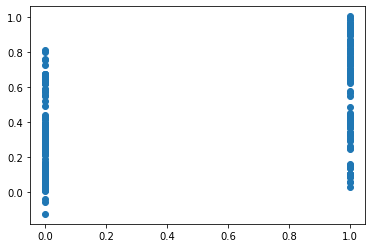

In [22]:
plt.scatter(y_test, prediction)

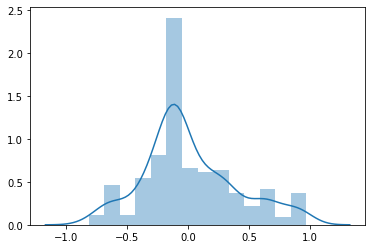

In [23]:
sns.distplot((y_test-prediction))

In [33]:
prediction_linR = lm.predict(df_test)
myPrediction_linR = pd.DataFrame(prediction_linR, PassengerId_test, columns=['Survived'])
myPrediction_linR['Survived'] = np.where(prediction_linR > 0.5, 1, 0)
myPrediction_linR.to_csv("results/Titianic_linR_model.csv", index_label = ["PassengerId"])b

In [34]:
myPrediction_linR

,Survived
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
1308,0


### Decision tree

In [36]:
clf_DTC = DTC(max_depth=4)

In [37]:
clf_DTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
y_pred_test = clf_DTC.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.7983193277310925

### Logistic Regression

In [39]:
logi_regg = LogisticRegression()
clf_LogiReg = logi_regg.fit(X_train,y_train)

/home/shota/.local/share/virtualenvs/kaggle_titanic_python-Ngoqgtmj/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
clf_LogiReg.coef_

array([[-0.99298967,  2.58354723, -0.02846661, -0.22534063]])

In [41]:
clf_LogiReg.intercept_

array([1.64864336])

In [42]:
y_pred_LogiReg = clf_LogiReg.predict(X_test)
accuracy_score(y_test, y_pred_LogiReg)

0.7899159663865546